In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Step 2: Load dataset
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names=columns, na_values=' ?', skipinitialspace=True)
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Step 3: Basic Data Exploration
def data_explore(df):
    print("Shape:", df.shape)
    print("Data Types:\n", df.dtypes)
    print("\nNumerical Columns:", df.select_dtypes(include=['int64', 'float64']).columns.tolist())
    print("Categorical Columns:", df.select_dtypes(include='object').columns.tolist())

data_explore(df)


Shape: (32561, 15)
Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Numerical Columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [7]:
# Step 4: Check and Handle Missing Values
def data_check(df):
    missing_percent = df.isna().mean() * 100
    print("\nMissing Values (%):\n", missing_percent[missing_percent > 0])

data_check(df)
# Drop rows with missing values
df.dropna(inplace=True)


Missing Values (%):
 Series([], dtype: float64)


In [8]:
# Step 5: Remove Duplicates
df.drop_duplicates(inplace=True)

In [9]:
import pandas as pd

def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Select numeric columns
    outliers = {}

    for col in numeric_cols:
        # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR (Interquartile Range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers (values outside the bounds)
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers

# Example of how to use it
outliers = detect_outliers_iqr(df)  # Assuming 'df' is your DataFrame
for column, outlier_data in outliers.items():
    print(f"Outliers for column {column}:")
    print(outlier_data)


Outliers for column age:
       age         workclass  fnlwgt     education  education_num  \
74      79           Private  124744  Some-college             10   
222     90           Private   51744       HS-grad              9   
430     80                 ?  107762       HS-grad              9   
918     81  Self-emp-not-inc  136063       HS-grad              9   
1040    90           Private  137018       HS-grad              9   
...    ...               ...     ...           ...            ...   
32277   90           Private  313749       HS-grad              9   
32367   90         Local-gov  214594       7th-8th              4   
32459   85           Private   98611     Bachelors             13   
32494   82                 ?  403910       HS-grad              9   
32525   81                 ?  120478     Assoc-voc             11   

           marital_status       occupation    relationship   race     sex  \
74     Married-civ-spouse   Prof-specialty  Other-relative  White    

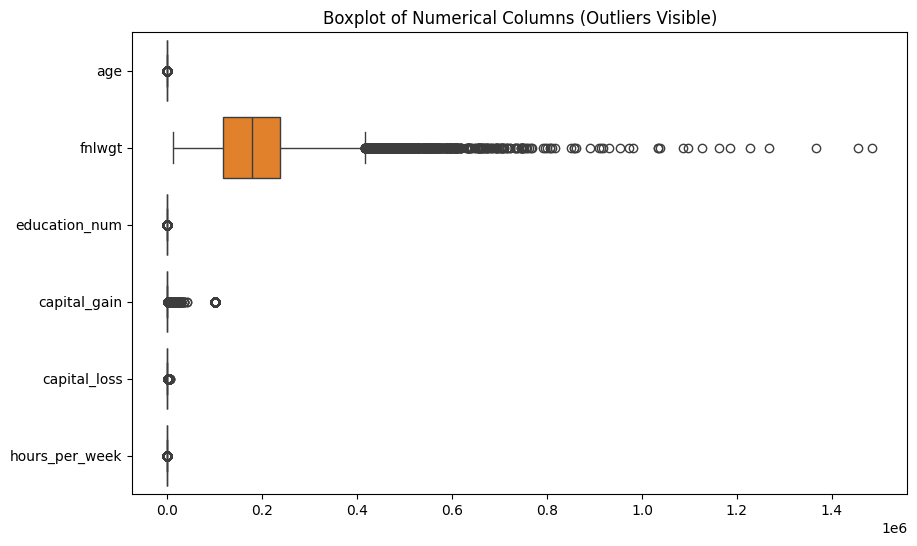

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for the numerical columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Numerical Columns (Outliers Visible)')
plt.show()



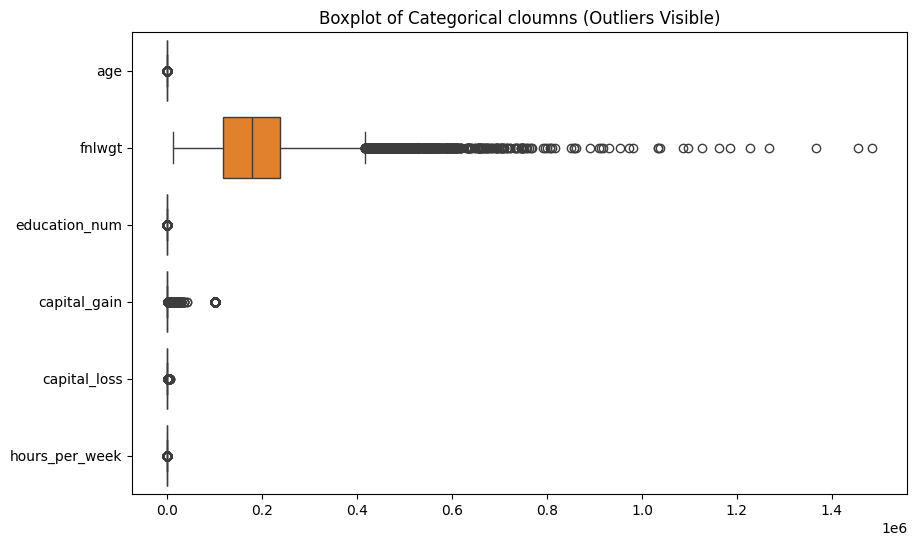

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for the categorical columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Categorical cloumns (Outliers Visible)')
plt.show()


In [12]:
# Step 6: Remove Outliers using IQR
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print("\nOutliers removed using IQR method.")
    return df

df = remove_outliers_iqr(df)


Outliers removed using IQR method.


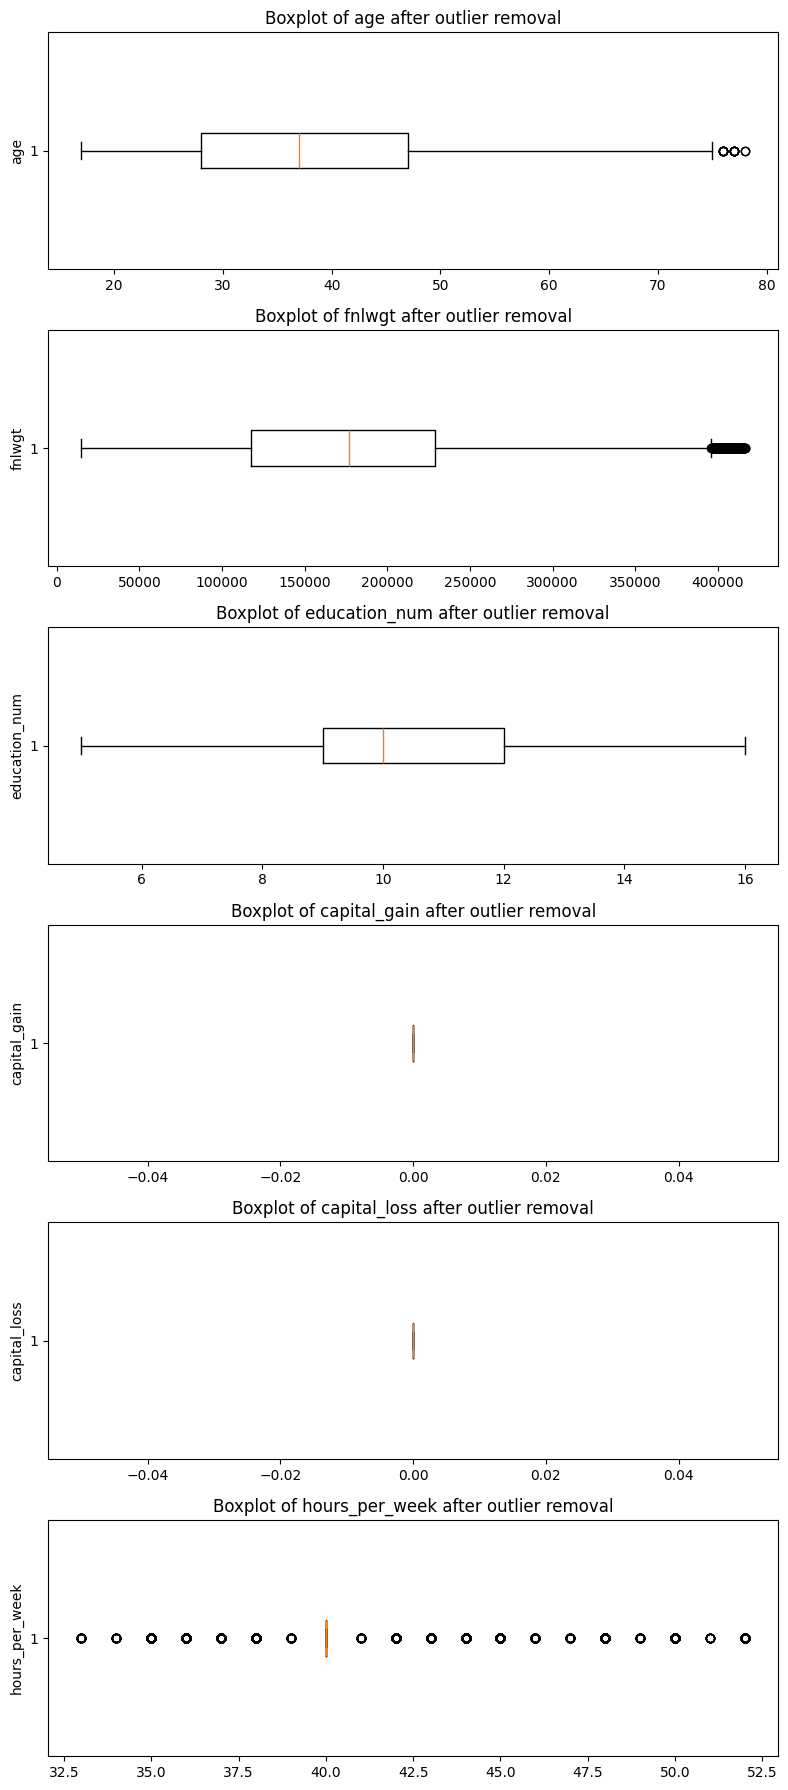

In [13]:
import matplotlib.pyplot as plt

# Plot boxplots after outlier removal
fig, axs = plt.subplots(len(df.select_dtypes(include=['int64', 'float64']).columns), 1, dpi=100, figsize=(8, 18)) # Changed this line
i = 0
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_title(f"Boxplot of {col} after outlier removal")
    i += 1

plt.tight_layout()
plt.show()

In [14]:
# Step 7: Label Encoding for Categorical Columns
def label_encoding(df):
    label_encoder = LabelEncoder()
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = label_encoder.fit_transform(df[col])
    print("\nCategorical columns encoded.")

label_encoding(df)


Categorical columns encoded.


In [15]:
# Step 8: Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# --- Standardization ---
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

# --- Normalization ---
minmax_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(minmax_scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)




In [17]:
# Step 9: Show final shape
print("Final dataset shape after preprocessing:", df.shape)

Final dataset shape after preprocessing: (18991, 15)


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
correlation_matrix = df.corr()


In [21]:
df.to_csv("preprocessed_data.csv", index=False)

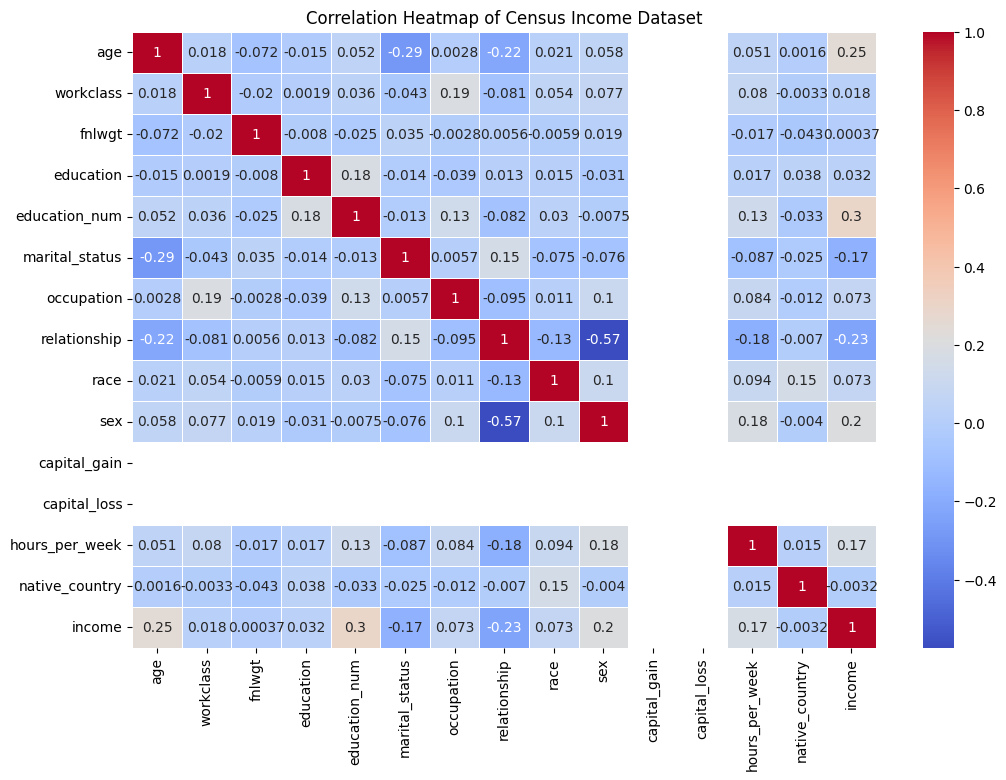

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Census Income Dataset")
plt.show()
